In [139]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehicle-dataset-from-cardekho/car data.csv
/kaggle/input/vehicle-dataset-from-cardekho/car details v4.csv
/kaggle/input/vehicle-dataset-from-cardekho/CAR DETAILS FROM CAR DEKHO.csv
/kaggle/input/vehicle-dataset-from-cardekho/Car details v3.csv


In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [141]:
%notebook matplotlib

In [142]:
from sklearn import metrics
import sklearn
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures,StandardScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [143]:
data=pd.read_csv("/kaggle/input/vehicle-dataset-from-cardekho/car data.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [144]:
data.shape

(301, 9)

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [146]:
data.describe(include='all')

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
count,301,301.000000,301.000000,301.000000,301.000000,301,301,301,301.000000
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.627907,4.661296,7.628472,36947.205980,NaN,NaN,NaN,0.043189
std,NaN,2.891554,5.082812,8.644115,38886.883882,NaN,NaN,NaN,0.247915
min,NaN,2003.000000,0.100000,0.320000,500.000000,NaN,NaN,NaN,0.000000
25%,NaN,2012.000000,0.900000,1.200000,15000.000000,NaN,NaN,NaN,0.000000
50%,NaN,2014.000000,3.600000,6.400000,32000.000000,NaN,NaN,NaN,0.000000
75%,NaN,2016.000000,6.000000,9.900000,48767.000000,NaN,NaN,NaN,0.000000


# The First Phase

**The first phase** of machine learning is preparing data  
By removing columns that are not in need  
Selecting Target, In this dataSet Selling Price is target

In [147]:
data.drop('Car_Name',axis=1,inplace=True)

In [148]:
maxed=data['Year'].max()
Age=data['Year'].apply(lambda x:(maxed+1)-x)
data.drop('Year',axis=1,inplace=True)
data.insert(0,'Age',Age)
data.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,5,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,6,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,8,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,5,4.60,6.87,42450,Diesel,Dealer,Manual,0


# The Second Phase

**The Second Phase** of Machine Learning is visulization the dataset.  
Checking the relationship of other features with target  we will be doing it in two ways

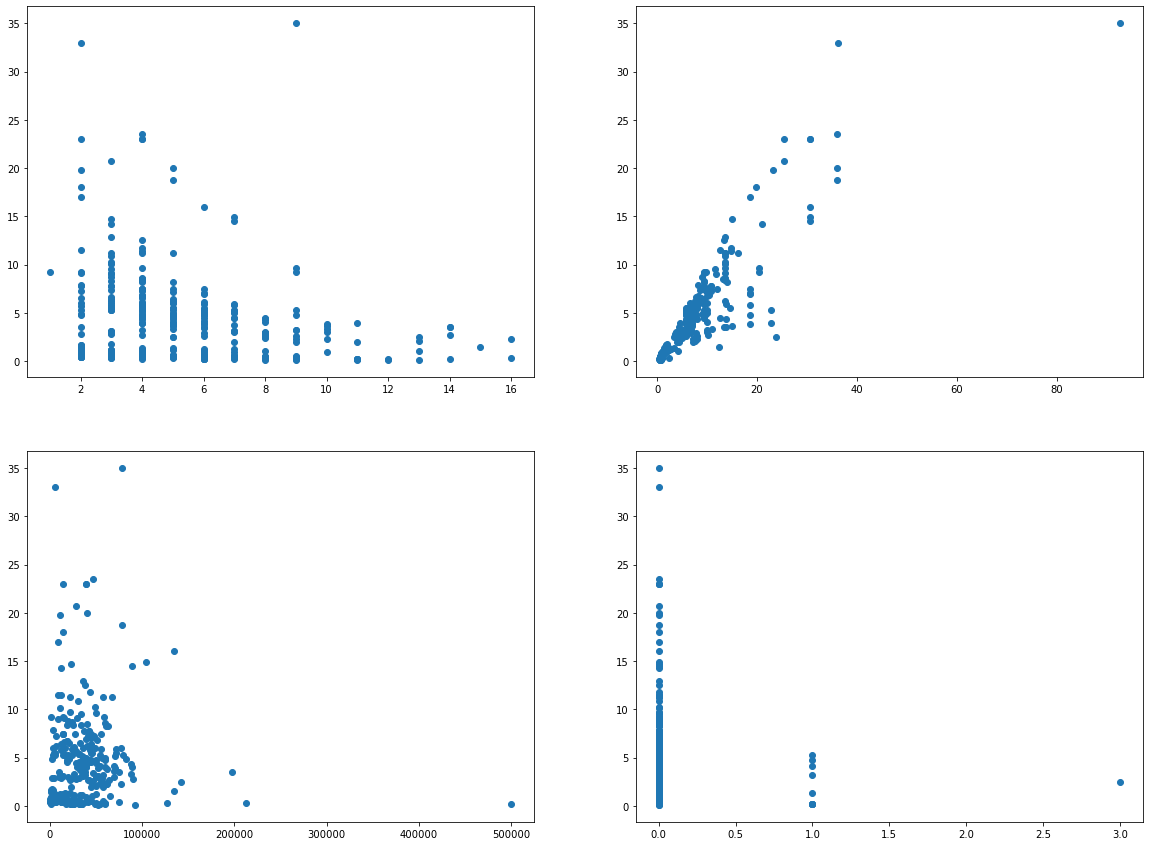

In [149]:
fig=plt.figure(figsize=(20,15))
fs=mpl.gridspec.GridSpec(2,2)
ax0=fig.add_subplot(fs[0:1,0:1])
ax0.scatter(data['Age'],data['Selling_Price'])

ax1=fig.add_subplot(fs[0:1,1:])
ax1.scatter(data['Present_Price'],data['Selling_Price'])

ax2=fig.add_subplot(fs[1:2,0:1])
ax2.scatter(data['Kms_Driven'],data['Selling_Price'])

ax3=fig.add_subplot(fs[1:2,1:])
ax3.scatter(data['Owner'],data['Selling_Price'])

As we can see Outliers in the above graph  
  
  Now we Should know the indexes of these outliers

In [150]:
data[(data['Present_Price'])>80]

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
86,9,35.0,92.6,78000,Diesel,Dealer,Manual,0


In [151]:
data[(data['Kms_Driven'])>450000]

,Age,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
196,11,0.17,0.52,500000,Petrol,Individual,Automatic,0


In [152]:
data.drop(index=[86,196],inplace=True)

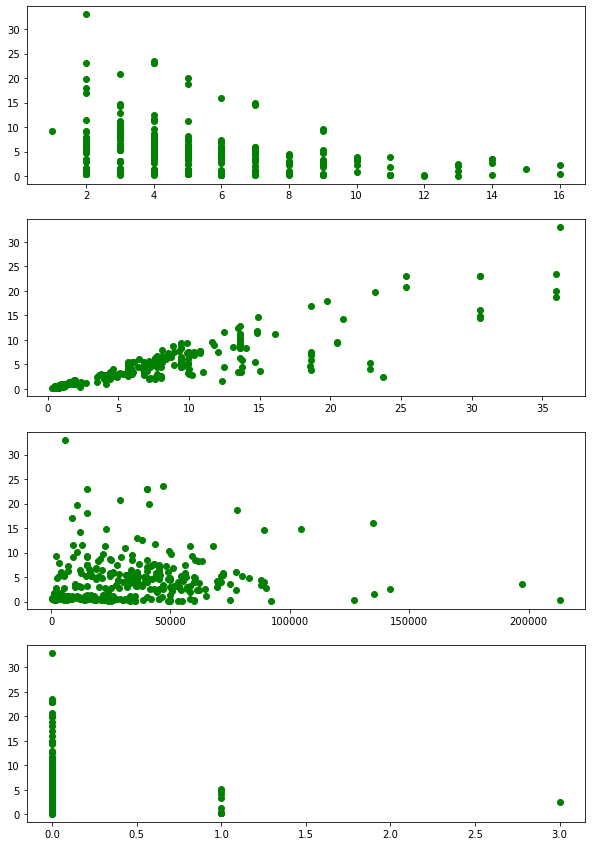

In [153]:
data_visual=['Age','Present_Price','Kms_Driven','Owner']
fig , ax = plt.subplots(4,1,figsize=(10,15))
for index,item in enumerate(data_visual):
    ax[index].scatter(data[item],data['Selling_Price'],color='g')

# Checking Null Values

In [154]:
data.isnull().sum()

Age              0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# The Third Stage

**The Third Stage** of Machine Learning is change the categorical features into 0 and 1

In [155]:
data1=pd.get_dummies(data,columns=['Fuel_Type','Seller_Type','Transmission'],drop_first=True)
data1.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5,3.35,5.59,27000,0,0,1,0,1
1,6,4.75,9.54,43000,0,1,0,0,1
2,2,7.25,9.85,6900,0,0,1,0,1
3,8,2.85,4.15,5200,0,0,1,0,1
4,5,4.60,6.87,42450,0,1,0,0,1


In [156]:
data1.corr()

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Age,1.000000,-0.275162,0.014112,0.617777,0.185671,-0.070641,0.065955,0.034617,0.014893
Selling_Price,-0.275162,1.000000,0.883903,0.062810,-0.091101,0.549127,-0.537184,-0.570043,-0.412520
Present_Price,0.014112,0.883903,1.000000,0.337736,0.016221,0.498088,-0.489685,-0.591886,-0.453428
Kms_Driven,0.617777,0.062810,0.337736,1.000000,0.134016,0.257992,-0.259208,-0.212191,-0.087296
Owner,0.185671,-0.091101,0.016221,0.134016,1.000000,-0.052974,0.055223,0.125139,-0.052166
Fuel_Type_Diesel,-0.070641,0.549127,0.498088,0.257992,-0.052974,1.000000,-0.979364,-0.347161,-0.107406
Fuel_Type_Petrol,0.065955,-0.537184,-0.489685,-0.259208,0.055223,-0.979364,1.000000,0.355065,0.099645
Seller_Type_Individual,0.034617,-0.570043,-0.591886,-0.212191,0.125139,-0.347161,0.355065,1.000000,0.076886
Transmission_Manual,0.014893,-0.412520,-0.453428,-0.087296,-0.052166,-0.107406,0.099645,0.076886,1.000000


<AxesSubplot:>

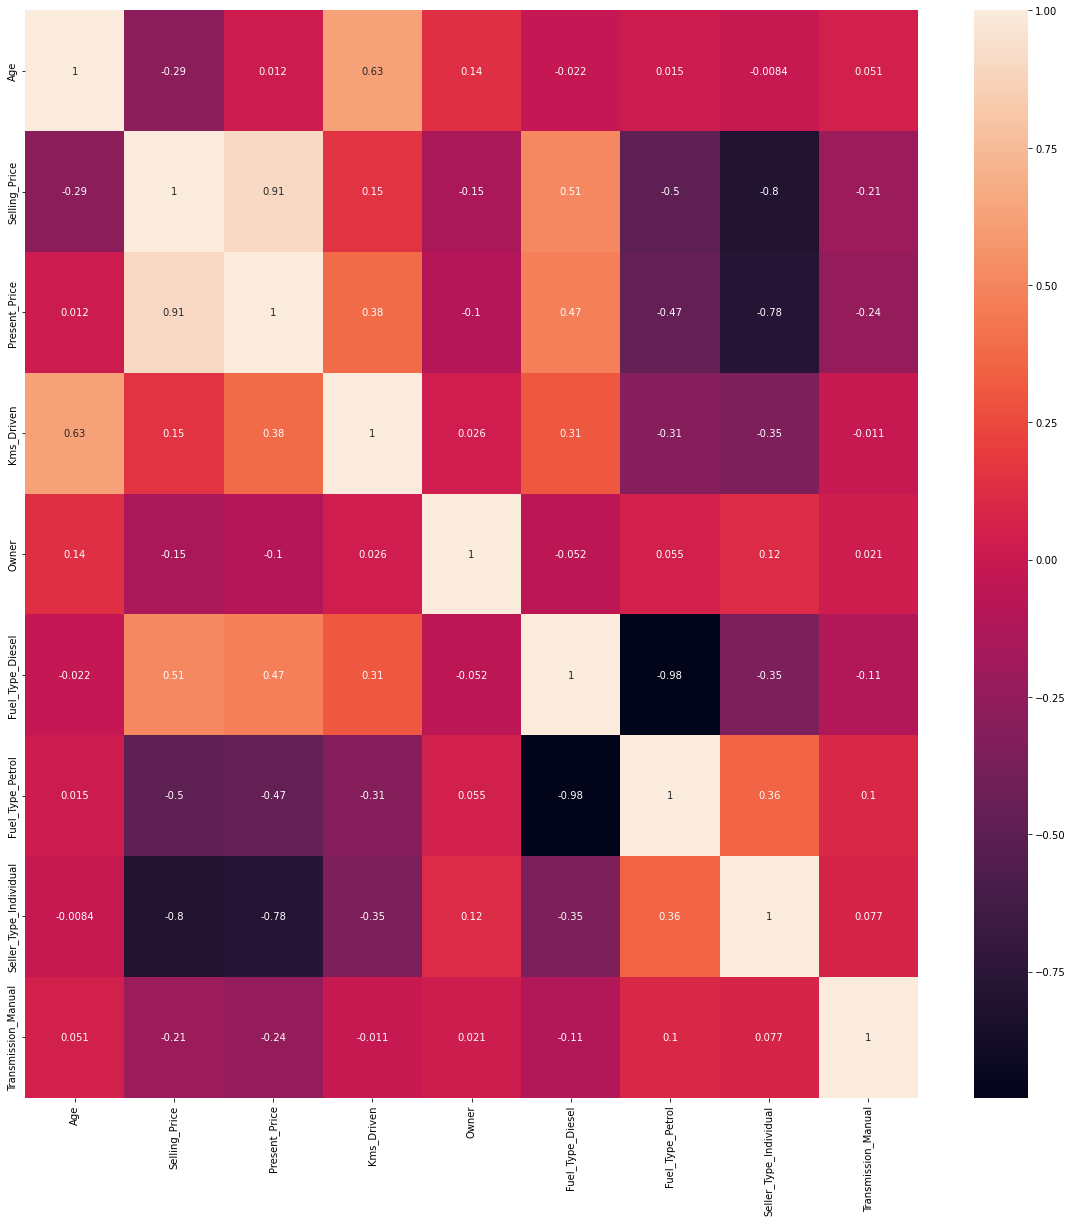

In [157]:
plot=data1.corr(method='spearman')
plt.figure(figsize=(20,20))
sns.heatmap(plot,annot=True)

Now reset the indexes after removing the outliers

In [158]:
data1.reset_index(drop=True,inplace=True)

In [159]:
data1.head()

,Age,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5,3.35,5.59,27000,0,0,1,0,1
1,6,4.75,9.54,43000,0,1,0,0,1
2,2,7.25,9.85,6900,0,0,1,0,1
3,8,2.85,4.15,5200,0,0,1,0,1
4,5,4.60,6.87,42450,0,1,0,0,1


# The Fourth Stage

**The Fourth Stage** of Machine Learning is training the model then testing it.  
And we are going to use Active Learning Method.  
**What is Active Learning**  
Active Learning is a special case of Supervised Machine Learning. This approach is used to construct a high-performance classifier while keeping the size of the training dataset to a minimum by actively selecting the valuable data points.

In [160]:
X=data1.drop('Selling_Price',axis=1)
y=data1['Selling_Price']

In [161]:
features = ['Age', 'Present_Price', 'Kms_Driven', 'Owner', 'Fuel_Type_Diesel',
            'Fuel_Type_Petrol', 'Seller_Type_Individual', 'Transmission_Manual']
target = 'Selling_Price'

In [162]:
train_df,test_df = train_test_split(data1,test_size=0.3,random_state=123)

In [163]:
model= LinearRegression()

In [164]:
model.fit(train_df[features], train_df[target])

LinearRegression()

In [165]:
score = model.score(test_df[features],test_df[target])
print('Initial Model Score:', score)

Initial Model Score: 0.8973651692080922


In [166]:
from sklearn.ensemble import RandomForestRegressor
# apply active learning
acc1=[]
for i in range(5):
        for i in range(50):
            # use random forest to identify the most uncertain samples
            rf = RandomForestRegressor()
            rf.fit(X, y)
            uncertainty = np.abs(rf.predict(X) - y)

            # select the most uncertain samples
            X_uncertain = X.iloc[np.argsort(uncertainty)[-5:]]
            y_uncertain = y.iloc[np.argsort(uncertainty)[-5:]]

            # add the uncertain samples to the training data
            X = pd.concat([X, X_uncertain], axis=0)
            y = pd.concat([y, y_uncertain], axis=0)

            # fit the model on the updated data
            model.fit(X, y)

            # evaluate the updated model
            score = model.score(X, y)
            acc1.append(score)
print(max(acc1))

0.9108292416869532
